# CS 105 Final Project: Animal Classifier
Hallie Pham (hpham087), Divyank Shah (dshah048), Nicholas Kang (nkang017), Majd Kawak (mkawa025), Ben Bravo (bbrav013)

For this project, our group decided to create a model that could accurately an animal's species based on an image.  This involved building a CNN (Convolutional Neural Network), which is a form of supervised learning.  

We are using a CNN because CNN’s have something called translation invariance, where they can recognize the subject of the image regardless of the position of the subject in the photo.  This is important for animal photos where we are unsure where the animal subject is located in the picture.  WE also use ReLU.  Essentially, ReLU, short for Rectified Linear Unit, helps our model by keeping only the positive values and ditching the negatives after each convolution layer. So, by leveraging ReLU, we're setting ourselves up for a smoother and more effective learning process, making our animal classification task a lot more accurate. 

Our project goal is for our model to be able to accurately classify animal species from a new image it has never seen, and to integrate this functionality onto a website that will interface with the model so that the user can upload any photo and it will be classified correctly.

The types of animals we can classify are as followed:
1. Bear
2. Cat
3. Eagle
4. Dog
5. Cow
6. Gorilla

The data we have used are from the following sites:
- https://www.csc.kth.se/~heydarma/Datasets.html
- https://images.cv/category/animal
- https://images.cv/animals-labeled-image-dataset

For each classification of animal, we used around 1,500 images per class.  

## Training

In [ ]:
! pip install tensorflow
! pip install keras

In [ ]:
import tensorflow as tf
import keras

print(tf.version.VERSION)
print(keras.__version__)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

#### Preprocessing
To preprocess our data, we are scaling our images then normalizing them.  For training, we are splitting our data into training and validation sets at a ratio of 70% for training and 30% for validation. We also convert the images as grayscale to reduce our color channels from RGB (3) to GRAYSCALE (1) to reduce the overall computation required. In addition, the values are normalized such that they range from 0 - 1 instead of 0 - 255

In [34]:
# Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    # Scales each pixel value in the image from a range of 0-255 to 0-1 for normalization
    rescale=1./255,
    # Split the data into training (70%) and validation (30%)
    validation_split=0.3,
)

# Validation Data
validation_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.3
)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    'animal_database/',
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Set as training data
    color_mode="grayscale",
)

# Flow validation images in batches of 32 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    'animal_database/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Set as validation data
    color_mode="grayscale",
)

class_indices = train_generator.class_indices
print(class_indices)

Found 5782 images belonging to 6 classes.
Found 2473 images belonging to 6 classes.
{'bear': 0, 'cat': 1, 'cow': 2, 'dog': 3, 'eagle': 4, 'gorilla': 5}


In [35]:
# Model Architecture
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Fourth convolutional block
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dropout(0.5),

    # Fully connected layers
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [36]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
# If the validation accuracy does not improve (increase, since mode='max') for 10 consecutive epochs, the training will stop.
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    mode='max',
    restore_best_weights=True,
    verbose=1
)

# Train your model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

Epoch 1/200


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 135s 737ms/step - accuracy: 0.3251 - loss: 2.1960 - val_accuracy: 0.1944 - val_loss: 7.1372
Epoch 2/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - accuracy: 0.4375 - loss: 0.7838 - val_accuracy: 0.1111 - val_loss: 4.4725
Epoch 3/200


2024-03-18 02:11:25.665143: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-03-18 02:11:25.719092: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 129s 715ms/step - accuracy: 0.5517 - loss: 1.3413 - val_accuracy: 0.1786 - val_loss: 3.9029
Epoch 4/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - accuracy: 0.5938 - loss: 0.6211 - val_accuracy: 0.0000e+00 - val_loss: 2.5858
Epoch 5/200


2024-03-18 02:13:35.533933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:13:35.585621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 126s 699ms/step - accuracy: 0.6554 - loss: 1.0001 - val_accuracy: 0.3003 - val_loss: 2.0703
Epoch 6/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 344us/step - accuracy: 0.7812 - loss: 0.3741 - val_accuracy: 0.3333 - val_loss: 1.2028
Epoch 7/200


2024-03-18 02:15:42.387061: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:15:42.439351: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 128s 710ms/step - accuracy: 0.7120 - loss: 0.8268 - val_accuracy: 0.5929 - val_loss: 1.2634
Epoch 8/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - accuracy: 0.8125 - loss: 0.3081 - val_accuracy: 0.4444 - val_loss: 0.8002
Epoch 9/200


2024-03-18 02:17:51.432496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:17:51.484522: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 129s 713ms/step - accuracy: 0.7571 - loss: 0.7190 - val_accuracy: 0.5146 - val_loss: 1.9126
Epoch 10/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.6875 - loss: 0.5074 - val_accuracy: 0.5556 - val_loss: 0.6622
Epoch 11/200


2024-03-18 02:20:01.150149: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:20:01.203733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 129s 713ms/step - accuracy: 0.7906 - loss: 0.6141 - val_accuracy: 0.6307 - val_loss: 1.3296
Epoch 12/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 316us/step - accuracy: 0.6875 - loss: 0.3213 - val_accuracy: 0.6667 - val_loss: 0.5673
Epoch 13/200


2024-03-18 02:22:10.570116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:22:10.617608: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 132s 731ms/step - accuracy: 0.7963 - loss: 0.5812 - val_accuracy: 0.4850 - val_loss: 2.2113
Epoch 14/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 377us/step - accuracy: 0.7188 - loss: 0.3140 - val_accuracy: 0.3333 - val_loss: 2.4738
Epoch 15/200


2024-03-18 02:24:23.250516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:24:23.311156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 133s 735ms/step - accuracy: 0.8228 - loss: 0.5189 - val_accuracy: 0.7171 - val_loss: 0.9988
Epoch 16/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 324us/step - accuracy: 0.9375 - loss: 0.1295 - val_accuracy: 0.7778 - val_loss: 0.3187
Epoch 17/200


2024-03-18 02:26:36.817354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:26:36.866909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 130s 723ms/step - accuracy: 0.8520 - loss: 0.4235 - val_accuracy: 0.6830 - val_loss: 1.4923
Epoch 18/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 0.8125 - loss: 0.2867 - val_accuracy: 0.5556 - val_loss: 0.8052
Epoch 19/200


2024-03-18 02:28:48.027205: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:28:48.085873: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 134s 742ms/step - accuracy: 0.8540 - loss: 0.4054 - val_accuracy: 0.4501 - val_loss: 2.5939
Epoch 20/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 304us/step - accuracy: 0.7812 - loss: 0.2522 - val_accuracy: 0.2222 - val_loss: 2.6215
Epoch 21/200


2024-03-18 02:31:02.845360: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:31:02.893033: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 131s 726ms/step - accuracy: 0.8703 - loss: 0.3867 - val_accuracy: 0.5081 - val_loss: 2.3394
Epoch 22/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 0.8750 - loss: 0.1956 - val_accuracy: 0.4444 - val_loss: 1.2291
Epoch 23/200


2024-03-18 02:33:14.583222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:33:14.632655: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 133s 737ms/step - accuracy: 0.8819 - loss: 0.3359 - val_accuracy: 0.7058 - val_loss: 1.0980
Epoch 24/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 350us/step - accuracy: 0.9062 - loss: 0.1494 - val_accuracy: 0.4444 - val_loss: 1.0845
Epoch 25/200


2024-03-18 02:35:28.587950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:35:28.643398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 132s 731ms/step - accuracy: 0.8892 - loss: 0.3331 - val_accuracy: 0.7500 - val_loss: 0.9034
Epoch 26/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 325us/step - accuracy: 0.8125 - loss: 0.3478 - val_accuracy: 0.5556 - val_loss: 0.5845
Epoch 27/200


2024-03-18 02:37:41.312247: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:37:41.363552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 133s 737ms/step - accuracy: 0.9103 - loss: 0.2665 - val_accuracy: 0.7370 - val_loss: 0.8896
Epoch 28/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - accuracy: 0.8750 - loss: 0.1839 - val_accuracy: 0.7778 - val_loss: 0.2158
Epoch 29/200


2024-03-18 02:39:55.114527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:39:55.166098: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 135s 747ms/step - accuracy: 0.9010 - loss: 0.3056 - val_accuracy: 0.7833 - val_loss: 0.7796
Epoch 30/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 375us/step - accuracy: 0.8438 - loss: 0.2471 - val_accuracy: 0.8889 - val_loss: 0.0799
Epoch 31/200


2024-03-18 02:42:10.923368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:42:10.980988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 134s 740ms/step - accuracy: 0.9130 - loss: 0.2487 - val_accuracy: 0.8166 - val_loss: 0.7391
Epoch 32/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 328us/step - accuracy: 0.9375 - loss: 0.0778 - val_accuracy: 0.6667 - val_loss: 0.7172
Epoch 33/200


2024-03-18 02:44:25.319322: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:44:25.371254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 134s 743ms/step - accuracy: 0.9142 - loss: 0.2501 - val_accuracy: 0.7541 - val_loss: 1.0047
Epoch 34/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 306us/step - accuracy: 0.9375 - loss: 0.0951 - val_accuracy: 0.7778 - val_loss: 1.2329
Epoch 35/200


2024-03-18 02:46:40.234739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:46:40.282381: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 134s 745ms/step - accuracy: 0.9220 - loss: 0.2311 - val_accuracy: 0.8348 - val_loss: 0.6111
Epoch 36/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - accuracy: 0.9375 - loss: 0.1630 - val_accuracy: 0.8889 - val_loss: 0.1702
Epoch 37/200


2024-03-18 02:48:55.694212: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:48:55.753963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 133s 735ms/step - accuracy: 0.9232 - loss: 0.2051 - val_accuracy: 0.8145 - val_loss: 0.7253
Epoch 38/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 317us/step - accuracy: 0.8750 - loss: 0.1261 - val_accuracy: 0.7778 - val_loss: 0.2071
Epoch 39/200


2024-03-18 02:51:09.108576: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:51:09.158657: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 133s 734ms/step - accuracy: 0.9401 - loss: 0.1806 - val_accuracy: 0.8287 - val_loss: 0.6662
Epoch 40/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 325us/step - accuracy: 1.0000 - loss: 0.0285 - val_accuracy: 0.8889 - val_loss: 0.1946
Epoch 41/200


2024-03-18 02:53:22.484987: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:53:22.535839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 134s 742ms/step - accuracy: 0.9388 - loss: 0.1700 - val_accuracy: 0.7691 - val_loss: 1.1556
Epoch 42/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - accuracy: 0.9688 - loss: 0.0285 - val_accuracy: 0.5556 - val_loss: 1.2106
Epoch 43/200


2024-03-18 02:55:37.212744: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:55:37.263995: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 126s 697ms/step - accuracy: 0.9516 - loss: 0.1436 - val_accuracy: 0.6778 - val_loss: 1.4656
Epoch 44/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - accuracy: 0.9375 - loss: 0.1109 - val_accuracy: 0.7778 - val_loss: 0.4850
Epoch 45/200


2024-03-18 02:57:43.903062: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:57:43.955257: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 126s 700ms/step - accuracy: 0.9450 - loss: 0.1771 - val_accuracy: 0.8072 - val_loss: 0.7234
Epoch 46/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 0.9062 - loss: 0.1062 - val_accuracy: 0.8889 - val_loss: 0.4389
Epoch 47/200


2024-03-18 02:59:51.062758: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 02:59:51.112021: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 131s 727ms/step - accuracy: 0.9500 - loss: 0.1518 - val_accuracy: 0.8214 - val_loss: 0.6750
Epoch 48/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step - accuracy: 0.9375 - loss: 0.1051 - val_accuracy: 0.7778 - val_loss: 0.4377
Epoch 49/200


2024-03-18 03:02:03.365429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 03:02:03.433481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


180/180 ━━━━━━━━━━━━━━━━━━━━ 128s 710ms/step - accuracy: 0.9493 - loss: 0.1526 - val_accuracy: 0.8377 - val_loss: 0.5922
Epoch 50/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - accuracy: 0.9688 - loss: 0.0615 - val_accuracy: 0.8889 - val_loss: 0.2354
Epoch 50: early stopping
Restoring model weights from the end of the best epoch: 30.


2024-03-18 03:04:12.528241: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-18 03:04:12.581489: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Notice, when we run model fit, the model’s accuracy increases with each run. The ending accuracy was 96.88% after being trained on 1.5k photos.  We initially trained the model with only about 100 photos per class and the accuracy was only 56.8%. 

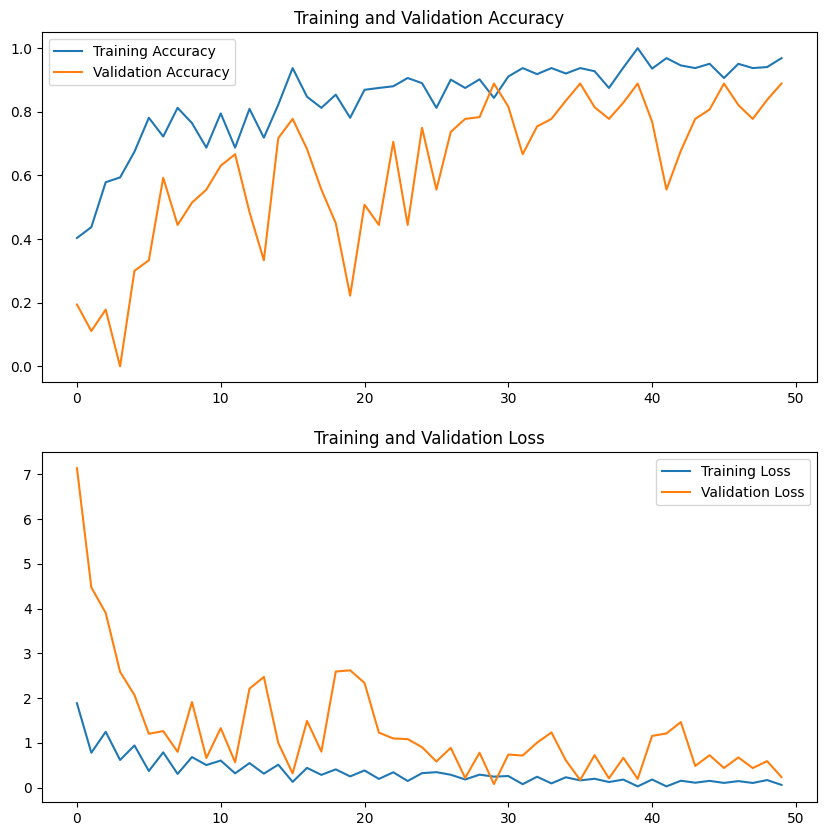

In [37]:
# Plotting Training Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(212)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [39]:
model.save('animals.keras')